In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk
from ase.io import read, write
from atomrdf.structure import System
from atomrdf import KnowledgeGraph
from pyscal3 import System as PSystem

In [20]:
n = 30
print(n**3*4)
s_ase = bulk('Cu').repeat((n,n,n))
#write('struct.data', s_ase, format='lammps-data', atom_style='atomic')
write('struct.cif', s_ase, format='cif',)
#sys = System.create.element.Cu(repetitions=(n,n,n))
#sys.write.file('struct.data')

108000


In [21]:
%%timeit
sys = read('struct.cif', format='cif')

KeyboardInterrupt: 

In [33]:
n_cif = np.array([2, 4, 7, 10, 20])
N_cif = n_cif**3*4
#direct read through atomrdf
time_ase_cif = np.array([2.76, 8.95, 40.7, 179, 7720])

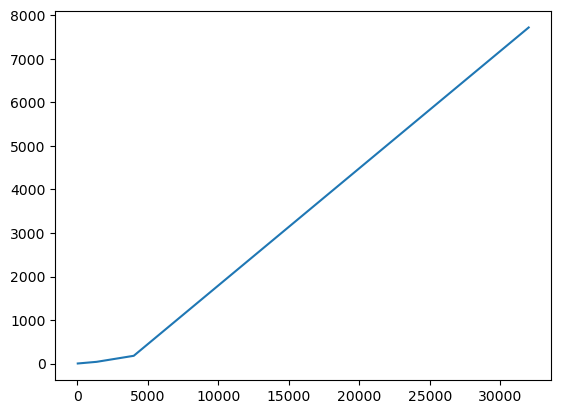

In [24]:
plt.plot(N, time_ase)

In [3]:
kg = KnowledgeGraph()

Read with triples with atomrdf

In [4]:
%%timeit
sys = System.read.file('struct.cif', format='cif', graph=kg)

TypeError: format recieved an unknown option cif

Read without triples with atomrdf

In [8]:
%%timeit
sys = System.read.file('struct.data', format='lammps-data')

2.64 ms ± 77.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Read with ASE

In [9]:
%%timeit
sys = read('struct.cif', format='cif')

181 ms ± 7.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Tests for Cu structure with n repetitions in lammps-data format

In [28]:
n = np.array([2, 4, 7, 10, 20, 30, 50, 70, 100])
#direct read through atomrdf
time_atomrdf = np.array([2.04, 2.82, 3.94, 8.9, 50.5, 178, 670, 2090, 5530])
#read through atomrdf with triples on
time_atomrdf_triples = np.array([8.33, 13.7, 17.3, 30.2, 128, 427, 1780, 4980, 13900])
#direct read through ase
time_ase = np.array([1.17, 1.3, 3.22, 6.62, 41.1, 126, 554, 1470, 4470])

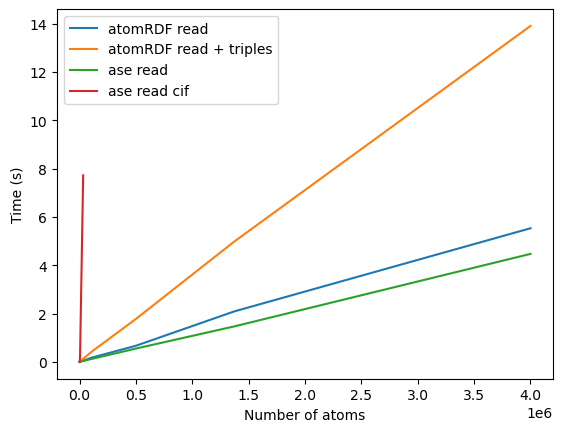

In [35]:
N = n**3*4
plt.plot(N, time_atomrdf/1000, label='atomRDF read')
plt.plot(N, time_atomrdf_triples/1000, label='atomRDF read + triples')
plt.plot(N, time_ase/1000, label='ase read')
plt.plot(N_cif, time_ase_cif/1000, label='ase read cif')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of atoms')
plt.ylabel('Time (s)')
plt.legend()
#plt.savefig('read_time.png', bbox_inches='tight')